# [House Price Competition](https://www.kaggle.com/c/home-data-for-ml-course)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Introduction

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

filepath = './home-data-for-ml-course/train.csv'

home_data = pd.read_csv(filepath, index_col='Id')

print('>>> Sucessfully imported all libraries and dataset')

>>> Sucessfully imported all libraries and dataset


## I. Exploratory Data Analysis

In [2]:
home_data.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1289,120,RL,40.0,5664,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,278000
237,20,RL,65.0,8773,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,185500
1132,20,RL,63.0,10712,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,9,2007,Oth,Abnorml,93500
711,30,RL,56.0,4130,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,52000
1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
540,20,RL,NaN,11423,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,2000,5,2010,WD,Normal,272000
1416,120,RL,51.0,3635,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,175900
403,30,RL,60.0,10200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,8,2008,WD,Normal,108000
1092,160,FV,24.0,2160,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,160000


In [24]:
home_data.shape

(1460, 80)

There are 1460 rows and 80 columns. The target column we want to predict is SalePrice. This is a regression problem.

### 1. Numerical columns

In [25]:
num_cols = home_data.select_dtypes(exclude=['object']).columns

num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [26]:
num_data = home_data[num_cols]

num_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [27]:
num_data.shape

(1460, 37)

There are 37 numerical columns including the target column SalePrice.

#### Target column

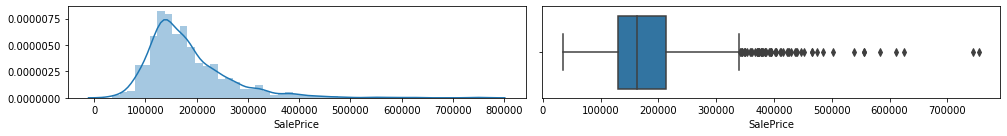

In [28]:
target = num_data['SalePrice']
num_attr = num_data.drop('SalePrice', axis=1)

fig = plt.figure(figsize=(14,2))

fig.add_subplot(1,2,1)
sns.distplot(target.dropna())

fig.add_subplot(1,2,2)
sns.boxplot(x=target.dropna())

plt.tight_layout()

#### Distribution plots

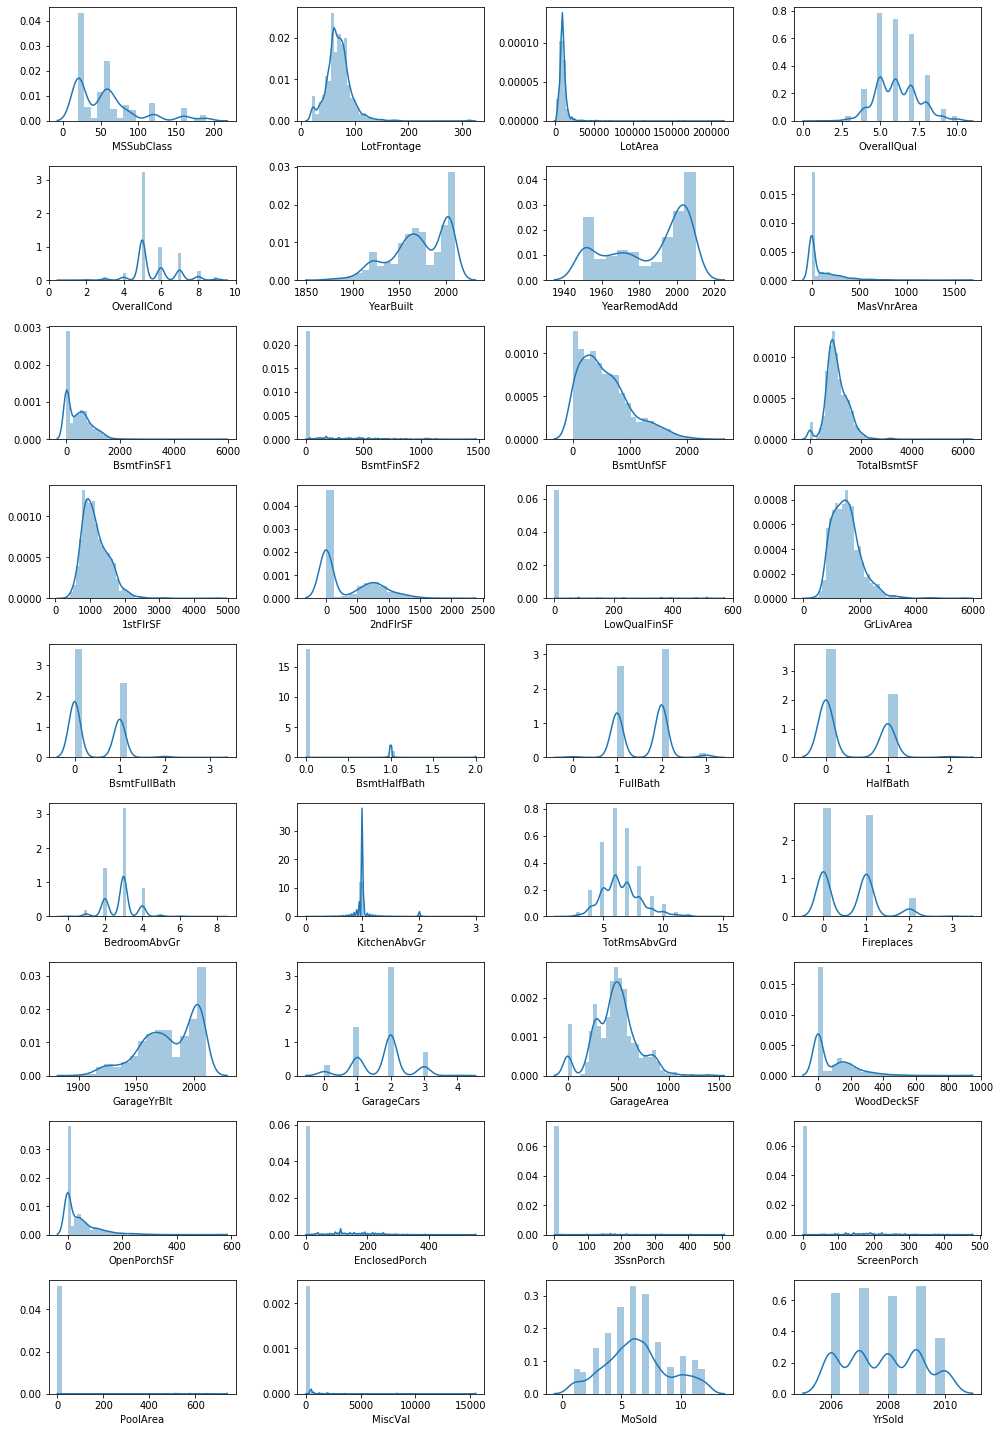

In [29]:
fig = plt.figure(figsize=(14,20))

for i in range(num_attr.shape[1]):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attr.iloc[:,i].dropna())

plt.tight_layout()

It appears that some distributions are skewed. This can affect the prediction accuracy of regression models. We may need to apply logarithm transformation to minimize the skew of the dataset.

#### Box plots (univariate analysis)

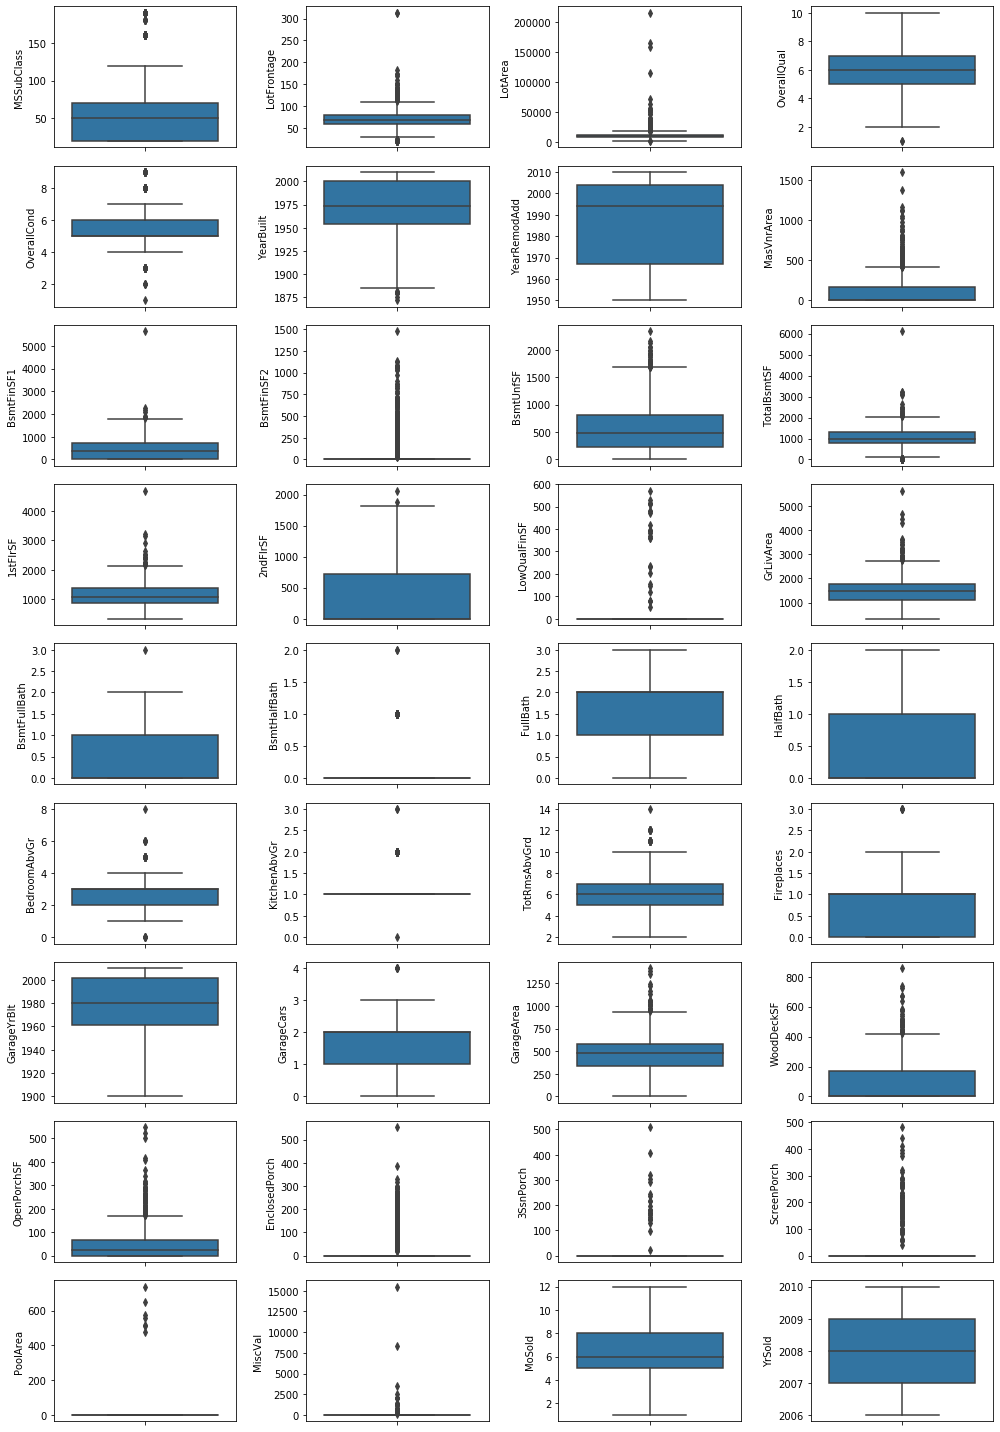

In [30]:
fig = plt.figure(figsize=(14,20))

for i in range(num_attr.shape[1]):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=num_attr.iloc[:,i].dropna())
    
plt.tight_layout()

#### Scatter plots with linear regression (bivariate analysis)

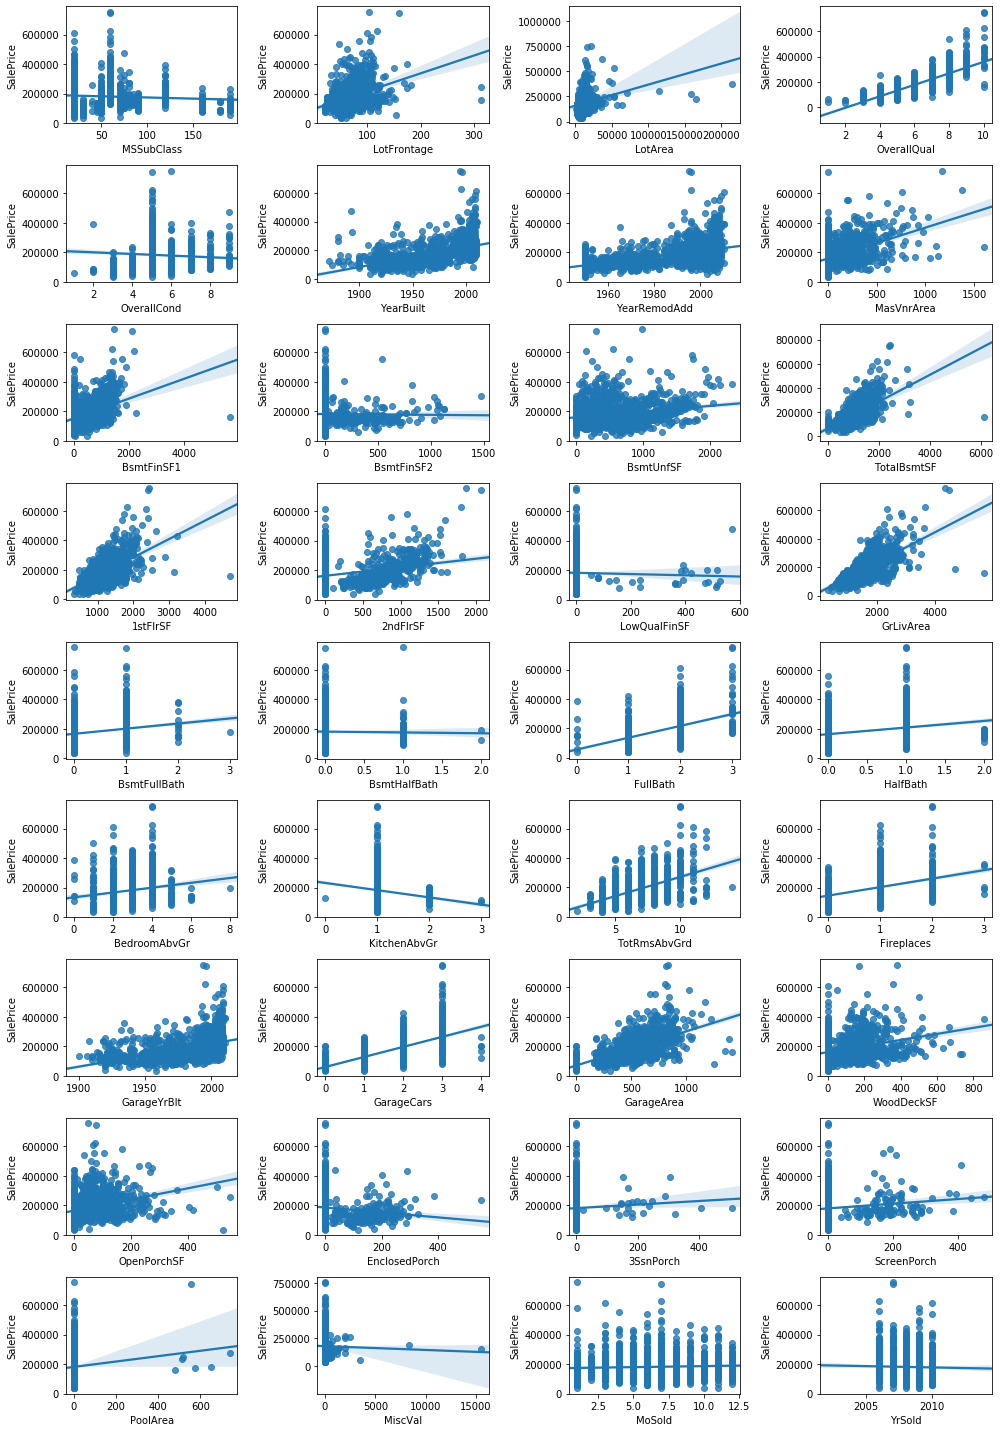

In [31]:
fig = plt.figure(figsize=(14,20))

for i in range(num_attr.shape[1]):
    fig.add_subplot(9,4,i+1)
    sns.regplot(x=num_attr.iloc[:,i], y=target)
    
plt.tight_layout()

We can notice many outliers that need to be removed:
* LotFrontage>300
* LotArea>10000
* MasVnrArea>1500
* BsmtFinSF1>4000
* TotalBsmtSF>6000
* 1stFlrSF>4000
* LowQualFinSF>550
* GrLivArea>4000 and SalePrice<300000

#### Correlations plot

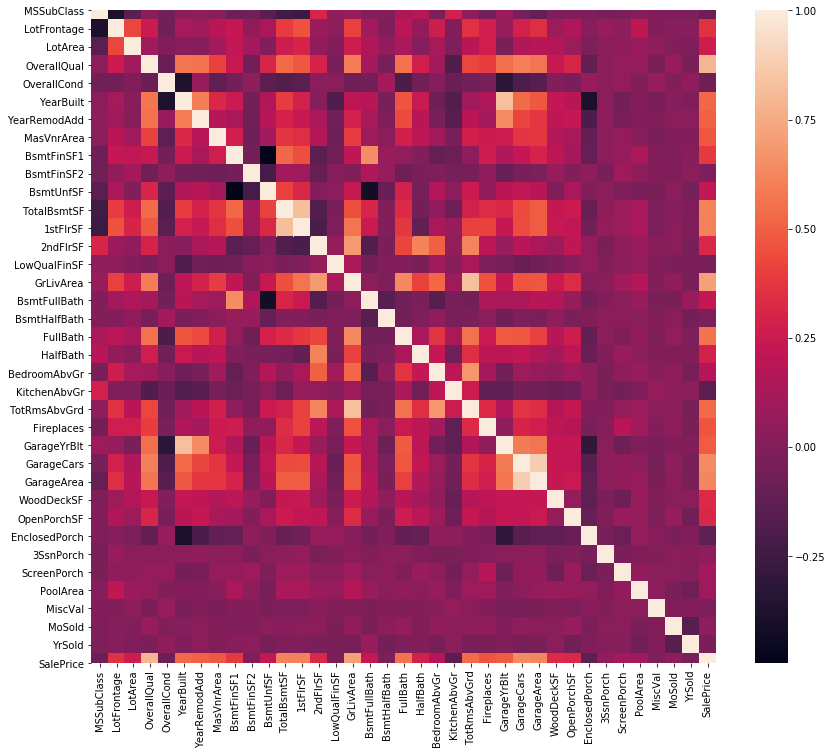

In [32]:
corr = home_data.corr()

fig = plt.figure(figsize=(14,12))
sns.heatmap(corr)

In [33]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Observations: 
* GarageYrBlt and YearBuilt are highly correlated (0.83)
* TotRmsAbvGrd and GrLivArea are highly correlated (0.83)
* GarageArea and GarageCars are highly correlated (0.88)
* 1stFlrSF and 'TotalBsmtSF' are highly correlated (0.82)

We can consider dropping these columns:
* MoSold, 3SsnPorch, BsmtFinSF2, BsmtHalfBath, MiscVal, LowQualFinSF, YrSold, OverallCond, MSSubClass: low and/or unclear non-linear correlation with SalePrice
* GarageYrBlt, TotRmsAbvGrd, GarageArea, 1stFloorSF: high correlation with another column (drop the one with lowest correlation with SalePrice)

#### Missing values

In [34]:
num_data.isnull().sum().sort_values(ascending=False).head()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
SalePrice        0
BsmtUnfSF        0
dtype: int64

How to deal:
* We can fill LotFrontage with a simple median or mean imputation. 
* GarageYrBlt will be dropped so don't need to deal with it. 
* MasVnrArea has the same number of missing values as MasVnrType (discovered in the next part of the exploration), leading to think that there are no masonry veneer in these cases. we can fill with 0.

### 2. Categorical columns

In [35]:
cat_cols = home_data.select_dtypes(include=['object']).columns

cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [36]:
cat_data = home_data[cat_cols]

cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [37]:
cat_data.shape

(1460, 43)

There are 43 categorical columns.

#### Count plots

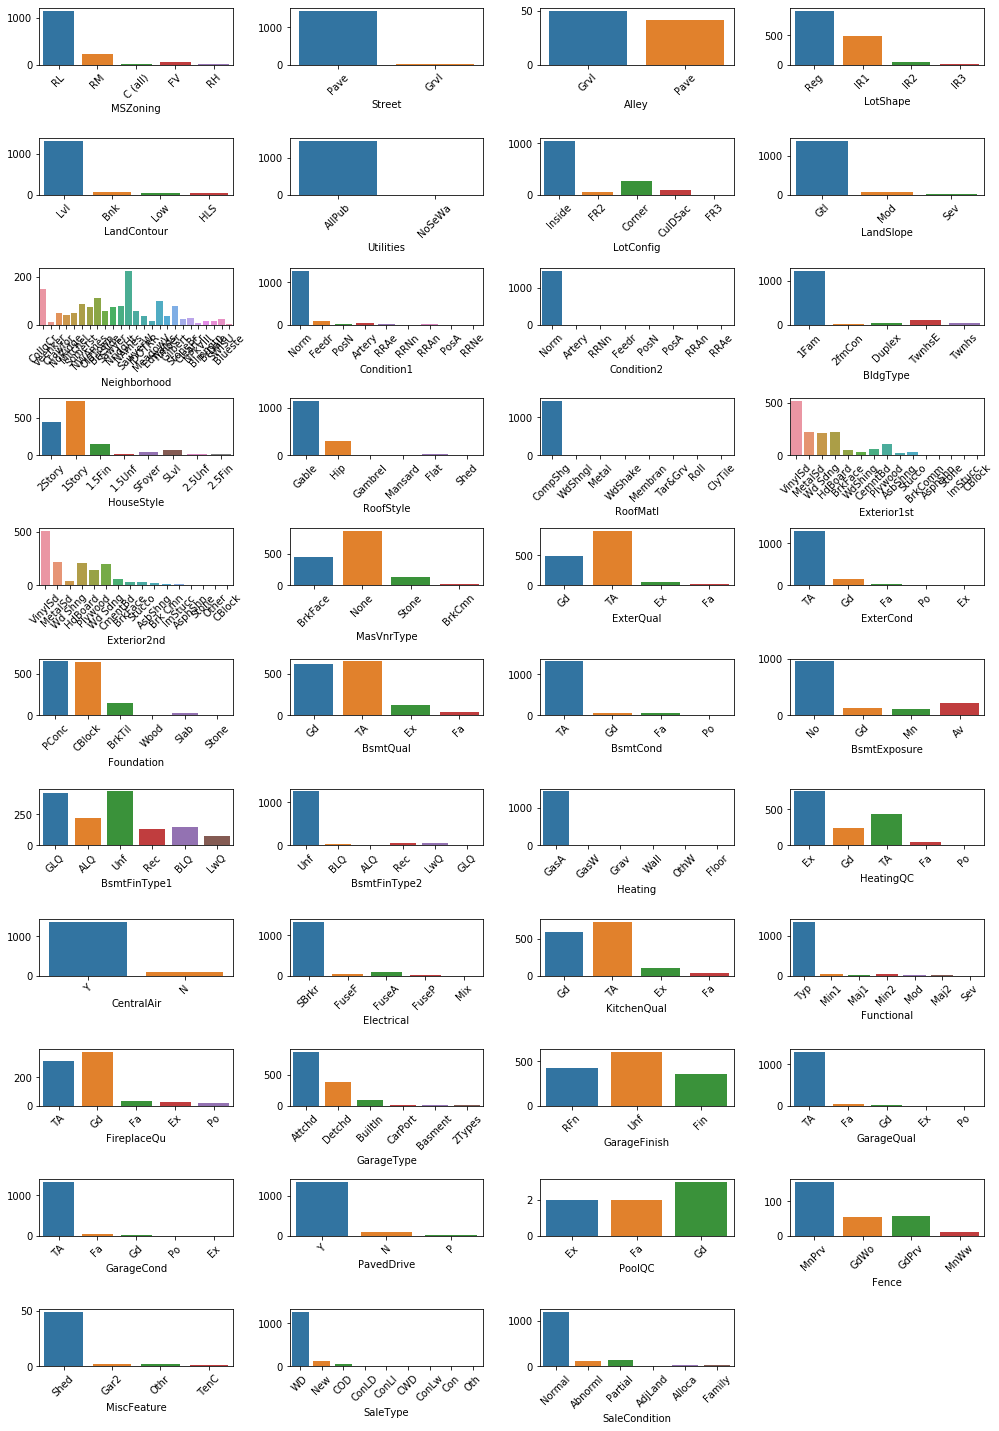

In [38]:
fig = plt.figure(figsize=(14,20))

for i in range (cat_data.shape[1]):
    fig.add_subplot(11,4,i+1)
    sns.countplot(x=cat_data.iloc[:,i])
    plt.xlabel(cat_data.columns[i])
    plt.ylabel('')
    plt.xticks(rotation=45)

plt.tight_layout()

Observations:
* Neighborhood, Exterior1st, Exterior2nd have high cardinality. We might consider dropping those features.
* ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond and PoolQC seem to be ordinal features. We may use label encoding on them.
* For the others we can use one-hot encoding.

#### Box plots

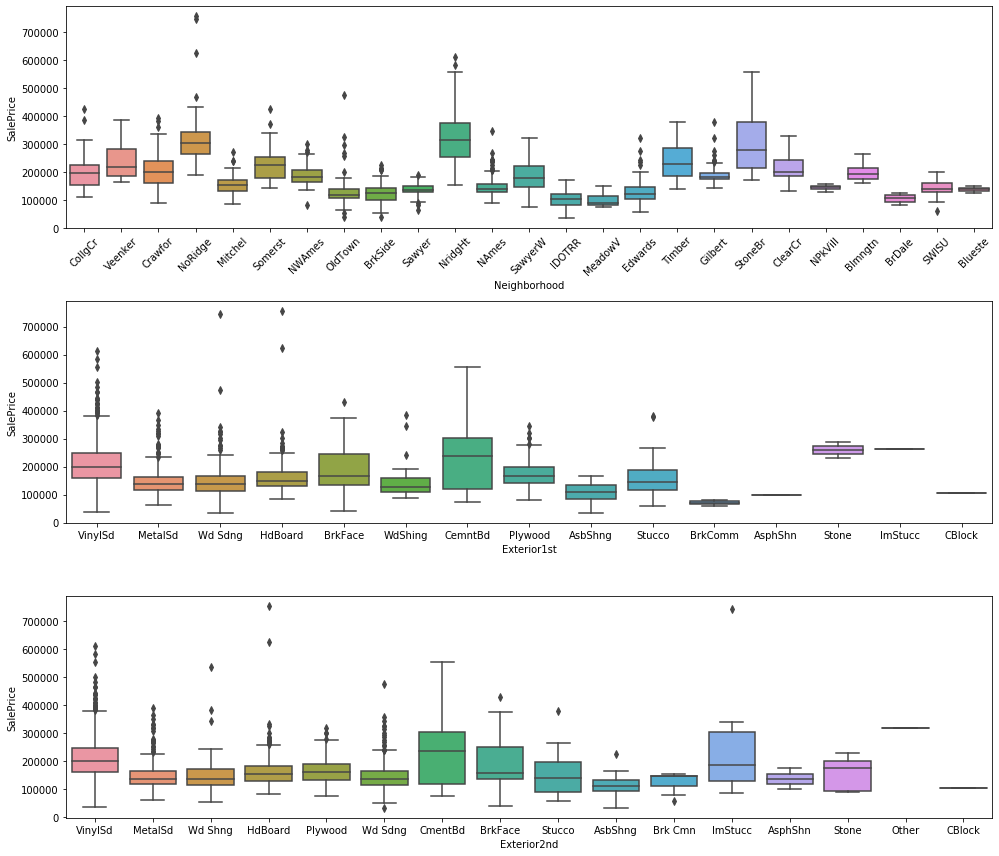

In [39]:
fig = plt.figure(figsize=(14,12))

fig.add_subplot(3,1,1)
sns.boxplot(x=cat_data.Neighborhood, y=target)
plt.xticks(rotation=45)

fig.add_subplot(3,1,2)
sns.boxplot(x=cat_data.Exterior1st, y=target)

fig.add_subplot(3,1,3)
sns.boxplot(x=cat_data.Exterior2nd, y=target)

plt.tight_layout()

#### Missing values

In [40]:
cat_data.isnull().sum().sort_values(ascending=False).head(17)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
dtype: int64

How to deal:
* We can assume that these values are missing because the houses do not have them (pool, garage, basement, ...) so we can fill them with 'None'.
* We will fill Electrical missisng value with the most fequent one.

## II. Data Cleaning and Preprocessing

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

print('>>> Sucessfully imported all libraries')

>>> Sucessfully imported all libraries


### 1. Dealing with missing values

In [42]:
# Create a copy of the dataset before doing operations on it
home_data_copy = home_data.copy()

# Numerical columns
num_cols_fill_0 = ['MasVnrArea']
num_cols_fill_median = ['LotFrontage']

home_data_copy[num_cols_fill_0] = home_data_copy[num_cols_fill_0].fillna(0)
home_data_copy[num_cols_fill_median] = home_data_copy[num_cols_fill_median].fillna(home_data_copy[num_cols_fill_median].median())

# Categorical columns
cat_cols_fill_frequent = ['Electrical']
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                  'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                  'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual',
                  'BsmtCond', 'MasVnrType', 'Electrical']

home_data_copy[cat_cols_fill_frequent] = home_data_copy[cat_cols_fill_frequent].fillna('SBrkr')
for col in cat_cols_fill_none:
    home_data_copy[col] = home_data_copy[col].fillna('None') 

In [43]:
# Checking for remaining missing values
home_data_copy.isnull().sum().sort_values(ascending=False).head()

GarageYrBlt    81
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
dtype: int64

### 2. Dealing with outliers

In [44]:
# Remove outliers based on observations on scatter plots against SalePrice
home_data_copy = home_data_copy[home_data_copy['LotFrontage']<300]
home_data_copy = home_data_copy[home_data_copy['LotArea']<100000]
home_data_copy = home_data_copy[home_data_copy['MasVnrArea']<1500]
home_data_copy = home_data_copy[home_data_copy['BsmtFinSF1']<4000]
home_data_copy = home_data_copy[home_data_copy['TotalBsmtSF']<6000]
home_data_copy = home_data_copy[home_data_copy['1stFlrSF']<4000]
home_data_copy = home_data_copy[home_data_copy['LowQualFinSF']<550]
home_data_copy = home_data_copy[(home_data_copy['GrLivArea']<4000)
                               |(home_data_copy['SalePrice']>300000)]

In [45]:
home_data_copy.shape

(1451, 80)

9 rows were dropped.

### 3. Logarithm transformation

In [46]:
# home_data_copy['SalePrice'] = np.log(home_data_copy['SalePrice'])
# home_data_copy = home_data_copy.rename(columns={'SalePrice': 'SalePrice_log'})

In [47]:
# home_data_copy.describe()

## III. Feature Selection and Engineering

In [48]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

print('>>> Sucessfully imported all libraries')

>>> Sucessfully imported all libraries


### 1. Dropping features

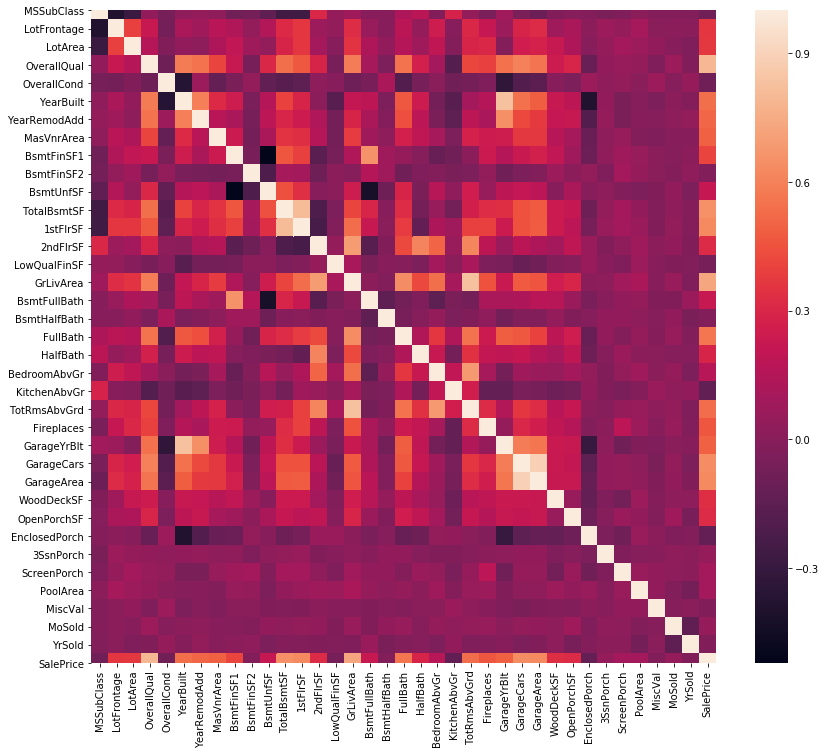

In [49]:
trans_corr = home_data_copy.corr()

fig = plt.figure(figsize=(14,12))
sns.heatmap(trans_corr)

In [50]:
# Remove cols with low correlation with SalePrice or too correlated with other cols
cols_drop = ['SalePrice', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
             'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
             'GarageYrBlt', 'TotRmsAbvGrd', 'GarageArea', '1stFlrSF']

X_drop = home_data_copy.drop(cols_drop, axis=1)
y = home_data_copy.SalePrice

X_drop.shape

(1451, 66)

There are 66 features remaining.

### 2. Encoding categorical features

In [63]:
# Columns to label encode
cols_label_enc = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','BsmtExposure', 
                  'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual',
                  'GarageCond', 'PoolQC']

label_encoder = LabelEncoder()
for col in cols_label_enc:
    X_drop[col] = label_encoder.fit_transform(X_drop[col])
    
# Columns to one-hot encode
cols_oh_enc = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour','LotConfig',
              'LandSlope', 'Condition1','Condition2', 'BldgType', 'HouseStyle',
              'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'BsmtFinType1',
              'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional',
              'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature',
              'SaleType', 'SaleCondition', 'Neighborhood', 'Exterior1st', 
              'Exterior2nd', 'Utilities']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X_drop[cols_oh_enc]))
OH_cols.columns = OH_encoder.get_feature_names(cols_oh_enc)
OH_cols.index = X_drop.index

X_enc = X_drop.drop(cols_oh_enc, axis=1) 
X_enc = pd.concat([X_enc, OH_cols], axis=1)

X_enc.shape

(1451, 244)

### 3. Selecting the best features

In [55]:
# Univariate feature selection
from sklearn.feature_selection import SelectKBest, f_classif

feature_cols = X_enc.columns
selector = SelectKBest(f_classif, k='all') # keep k features
X_new = selector.fit_transform(X_enc[feature_cols],y)

selected_features = pd.DataFrame(selector.inverse_transform(X_new), index=X_enc.index, columns=feature_cols)
dropped_columns = selected_features.columns[selected_features.var()==0]

X = X_enc.drop(dropped_columns, axis=1)
X.shape

C:\Users\laure\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


(1451, 244)

## IV. Model Selection

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVC

# X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2)

print('>>> Sucessfully imported all libraries')

>>> Sucessfully imported all libraries


### 1. Testing different models

In [57]:
rmse_comparison = pd.Series()
rmse_comparison.index.name = 'Model'

# XGBoost
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, objective ='reg:squarederror')
xgb_mse = -1*cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')

rmse_comparison['XGBoost'] = np.sqrt(xgb_mse).mean()

# Random Forest
rf_model = RandomForestRegressor(max_depth=15, min_samples_leaf=1, 
                                 min_samples_split=3, n_estimators=160)
rf_mse = -1*cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

rmse_comparison['RandomForest'] = np.sqrt(rf_mse).mean()

# Support Vector Machine (SVM)
ksvm_model = SVC()
ksvm_mse = -1*cross_val_score(ksvm_model, X, y, cv=5, scoring='neg_mean_squared_error')

rmse_comparison['SVM'] = np.sqrt(ksvm_mse).mean()

# Lasso
lasso_model = Lasso(alpha=110)
lasso_mse = -1*cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')

rmse_comparison['Lasso'] = np.sqrt(lasso_mse).mean()

# Linear Regression
linear_model = LinearRegression()
linear_mse = -1*cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')

rmse_comparison['LinearRegression'] = np.sqrt(linear_mse).mean()

print('RMSE for different models:')
print(rmse_comparison.sort_values(ascending=True))

C:\Users\laure\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


RMSE for different models:
Model
XGBoost             22608.504012
Lasso               25995.841480
RandomForest        26209.065662
LinearRegression    28440.028203
SVM                 65513.311959
dtype: float64


### 2. Hyperparameter Tuning

#### XGBoost

In [ ]:
# # XGBoost - Randomized Search
# xgb_param_distributions ={
#     'n_estimators': [100,200,300,400,500,600,700,800],
#     'learning_rate': [0.001,0.1,1],
#     'max_depth': [2,3,4,5]
# }

# xgb_model = XGBRegressor(objective ='reg:squarederror')
# xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_distributions,
#                                n_iter=100, cv=5, scoring='neg_mean_squared_error', verbose=2,
#                                n_jobs=-1)
# xgb_random.fit(X,y)

# print('Best params:', xgb_random.best_params_)
# print('Best score:', np.sqrt(-1*xgb_random.best_score_))

In [ ]:
# # XGBoost - Grid Search
# xgb_param_grid ={
#     'n_estimators': [200,300,400],
#     'learning_rate': [0.09,0.1,0.11],
#     'max_depth': [2,3,4]
# }

# xgb_model = XGBRegressor(objective ='reg:squarederror')
# xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, 
#                            scoring='neg_mean_squared_error', n_jobs=-1, verbose=False)
# xgb_grid.fit(X, y)

# print('Best params:', xgb_grid.best_params_)
# print('Best score:', np.sqrt(-1*xgb_grid.best_score_))

#### Random Forest

In [ ]:
# # Random Forest - Randomized Search
# rf_param_distributions ={
#     'n_estimators': [50,100,150,200,250,300],
#     'max_depth': [10,20,30,40,50],
#     'min_samples_leaf': [1,2,3,4,5],
#     'min_samples_split': [2,3,4,5,6]
# }

# rf_model = RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_distributions,
#                                n_iter=100, cv=5, scoring='neg_mean_squared_error', verbose=2,
#                                n_jobs=-1)
# rf_random.fit(X,y)

# print('Best params:', rf_random.best_params_)
# print('Best score:', np.sqrt(-1*rf_random.best_score_))

In [ ]:
# # Random Forest - Grid Search
# rf_param_grid ={
#     'n_estimators': [150,160,170],
#     'max_depth': [10,15,20],
#     'min_samples_leaf': [1,2,3],
#     'min_samples_split': [3,4,5]
# }

# rf_model = RandomForestRegressor()
# rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, 
#                        scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
# rf_grid.fit(X,y)

# print('Best params:', rf_grid.best_params_)
# print('Best score:', np.sqrt(-1*rf_grid.best_score_))

#### Lasso

In [ ]:
# # Lasso - Grid Search
# lasso_param_grid ={
#     'alpha': [80,90,100,110,120]
# }

# lasso_grid = GridSearchCV(estimator=lasso_model, param_grid=lasso_param_grid, cv=5, 
#                            scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
# lasso_grid.fit(X, y)

# print('Best params:', lasso_grid.best_params_)
# print('Best score:', np.sqrt(-1*lasso_grid.best_score_))

## V. Submission

In [59]:
# path to file you will use for predictions
test_data_path = './home-data-for-ml-course/test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path, index_col='Id')

print('>>> Sucessfully imported dataset')

>>> Sucessfully imported dataset


### 1. Test data cleaning and preprocessing

In [60]:
# Create a copy of the dataset before doing operations on it
X_test = test_data.copy()

# Dealing with the missing values in num columns
X_test[num_cols_fill_0] = X_test[num_cols_fill_0].fillna(0)

test_num_imputer = SimpleImputer(strategy='median')
X_num_test = pd.DataFrame(test_num_imputer.fit_transform(X_test.select_dtypes(exclude=['object'])))
X_num_test.columns = num_attr.columns

# Dealing with the missing values in num columns in cat columns
for col in cat_cols_fill_none:
    X_test[col] = X_test[col].fillna('None')

test_cat_imputer = SimpleImputer(strategy='most_frequent')
X_cat_test = pd.DataFrame(test_cat_imputer.fit_transform(X_test.select_dtypes(include=['object'])))
X_cat_test.columns = cat_cols

X_test = pd.concat([X_num_test, X_cat_test], axis=1)

# Remove cols with low correlation with SalePrice or too correlated with other cols
if 'SalePrice' in cols_drop:
    cols_drop.remove('SalePrice')
X_test = X_test.drop(cols_drop, axis=1)

# Label encoding
test_label_encoder = LabelEncoder()
for col in cols_label_enc:
    X_test[col] = test_label_encoder.fit_transform(X_test[col])

# One-Hot encoding
test_OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
test_OH_cols = pd.DataFrame(test_OH_encoder.fit_transform(X_test[cols_oh_enc]))
test_OH_cols.columns = test_OH_encoder.get_feature_names(cols_oh_enc)
test_OH_cols.index = X_test.index

X_test = X_test.drop(cols_oh_enc, axis=1) 
X_test = pd.concat([X_test, test_OH_cols], axis=1)

# Ensure test data is encoded in the same manner as training data with align command
final_train, final_test = X.align(X_test, join='left', axis=1)
final_train = final_train.fillna(0)
final_test = final_test.fillna(0)

print('>>> Cleaning and preprocessing done')

>>> Cleaning and preprocessing done


### 2. Create final model

In [61]:
# Create the final model
final_model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=3)

# Fitting the final model using all the data
final_model.fit(final_train, y)

[19:41:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 3. Make predictions for submission

In [62]:
# Making predictions for submission
test_predictions = final_model.predict(final_test)

# Save test predictions to file
output = pd.DataFrame({'Id': test_data.index,
                       'SalePrice': test_predictions})
output.to_csv('submission.csv', index=False)

print('>>> CSV file created')

>>> CSV file created
